<a href="https://colab.research.google.com/github/Selciya20102005/colab_projects/blob/main/TASK_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-8-579a75358f1d>:12: DtypeWarning: Columns (8,10,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
<ipython-input-8-579a75358f1d>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
<ipython-input-8-579a75358f1d>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
<ipython-input-8-579a75358f1d>:27: SettingWithCopyWarning: 
A value is trying to be set on a c

Model Accuracy: 0.8681135225375626

Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       124
         2.0       0.48      0.04      0.08      1473
         3.0       0.87      1.00      0.93     10383

    accuracy                           0.87     11980
   macro avg       0.45      0.35      0.34     11980
weighted avg       0.82      0.87      0.82     11980



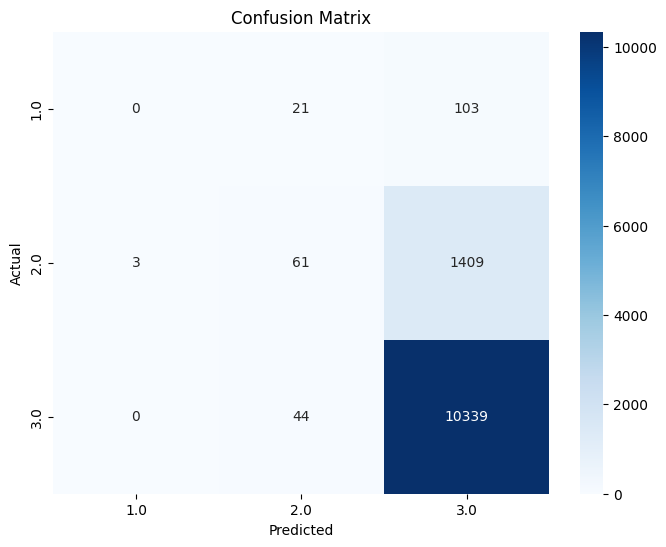

<ipython-input-8-579a75358f1d>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


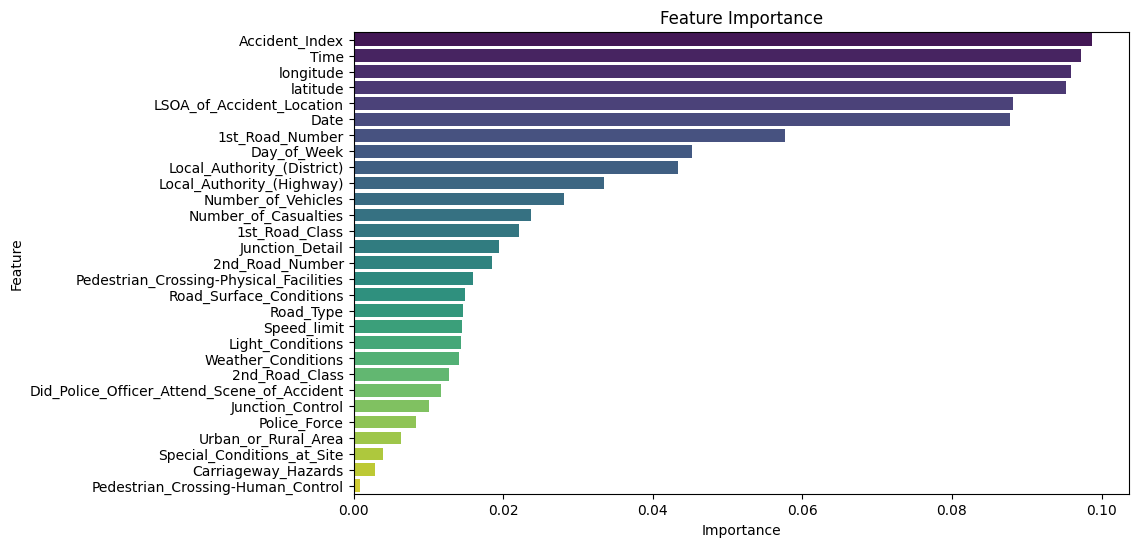

<ipython-input-8-579a75358f1d>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='coolwarm')


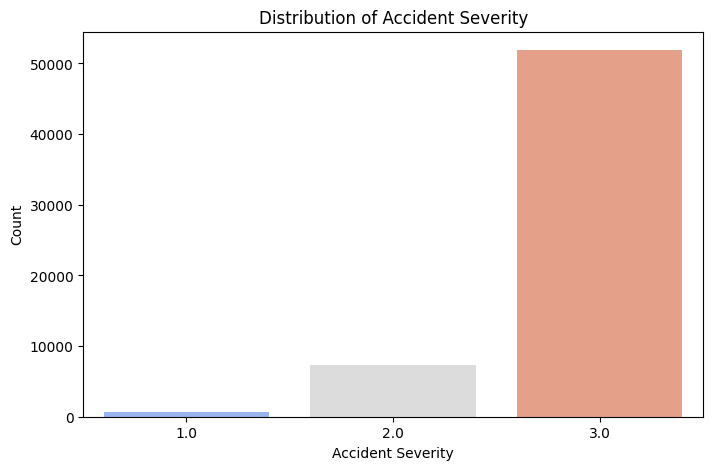

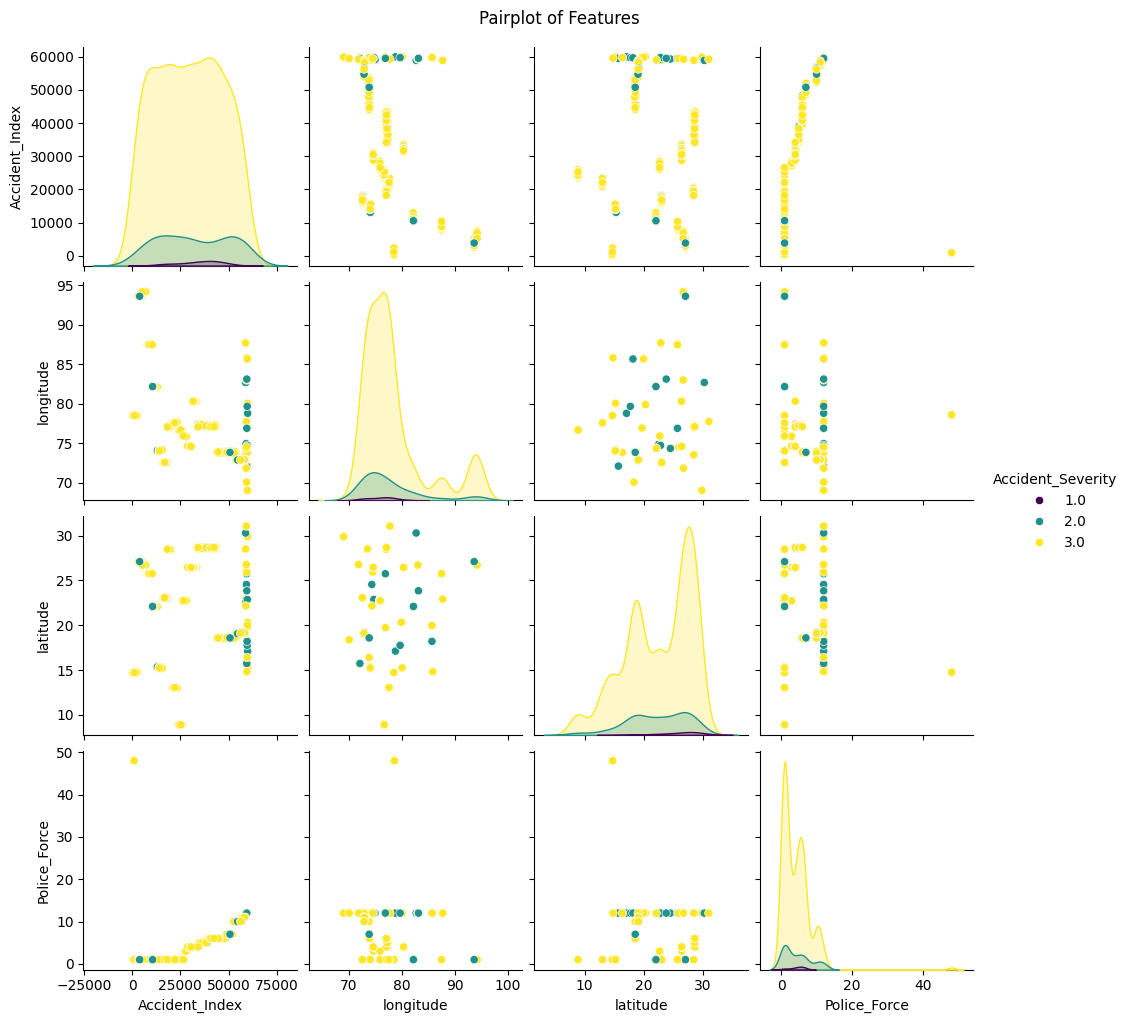

Analysis and Visualization Complete!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the Dataset
file_path = os.path.join(extract_path, 'AccidentsBig.csv')
data = pd.read_csv(file_path)

# Step 2: Preprocess the Dataset
data = data.dropna()

# Checking if target column exists
target_column = 'Accident_Severity'
if target_column not in data.columns:
    raise ValueError(f"Target column '{target_column}' not found in the dataset!")

# Encode categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


feature_columns = [col for col in data.columns if col != target_column]
X = data[feature_columns]
y = data[target_column]

# Step 3: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Machine Learning Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Visualizations

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Distribution of Accident Severity
plt.figure(figsize=(8, 5))
sns.countplot(x=y, palette='coolwarm')
plt.title('Distribution of Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()

# Pairplot of Features (Optional - Select Key Features)
if len(feature_columns) > 2:
    sample_size = min(1000, len(data))
    sample_data = data.sample(sample_size, random_state=42)
    sns.pairplot(sample_data, vars=feature_columns[:4], hue=target_column, palette='viridis')
    plt.suptitle('Pairplot of Features', y=1.02)
    plt.show()


print("Analysis and Visualization Complete!")
